#Practice Assignment


Q1) Load the MNIST dataset (mnist_784, version=1) from openml. How many number of samples are there in the dataset?

In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()
print(X.shape[0])

70000


Q2) Access the sample at the index 2022.
 * What is the label of the sample?  
 * What is the mean value of the sample?  
 * How many zeros are there in the sample? 

In [ ]:
#print(X[2022])
print('Label: ', y[2022])
print('Mean: ', X[2022].mean())
print('Number of zeroes: ',np.count_nonzero(X[2022] == 0))

Label:  2
Mean:  27.761479591836736
Number of zeroes:  643


Q3) Create a dataset by taking first 10000 images for training and next 2000 images for testing from the original dataset. Answer the following questions.

* How many unique classes are there in the training set?
* The number of training samples for the digit-6 are?
* The number of training samples for the digit-9 are?
* How many unique classes are there in the test set?
* Which class has more number of test samples?

Ans: b. (10,1014,978,10,1)

In [ ]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000], y[10000:12000]

In [ ]:
print('Unique classes in the training set:             ', np.unique(y_train))
print('The number of training samples for the digit-6: ', np.count_nonzero(np.where(y_train == '6')))
print('The number of training samples for the digit-9: ', np.count_nonzero(np.where(y_train == '9')))
print('Unique classes in the test set:                 ', np.unique(y_test))
print('The class has more number of test samples:      ', np.argmax(np.unique(y_test, return_counts=True)[1]))
print(np.unique(y_test, return_counts=True)[1])

Unique classes in the training set:              ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
The number of training samples for the digit-6:  1014
The number of training samples for the digit-9:  978
Unique classes in the test set:                  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
The class has more number of test samples:       1
[205 224 185 196 204 185 194 209 183 215]


Consider the above modified training and testing sets with first 10000 images for training and next 2000 images for testing.

Steps to be followed

* Collect all digit-6 (Positive class) and digit-9 (Negative class) images and stack them properly as a single datamatrix.
* By convention, keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
* Similarly, collect the respective labels and store it in a variable (Do sanity check).
* Set the label values to 1 for positive classes and -1 for negative classes.
* Load from sklearn.utils import shuffle
* Shuffle the datamatrix and labels. (Set random_state value to 1729).

In [ ]:
from sklearn.utils import shuffle

idx_6 = np.where(y_train == '6')
new_X_train_6 = X_train[idx_6]
new_y_train_6 = np.ones(len(y_train[idx_6]))

idx_9 = np.where(y_train == '9')
new_X_train_9 = X_train[idx_9]
new_y_train_9 = -1 * np.ones(len(y_train[idx_9]))
print(new_X_train_6.shape, new_X_train_9.shape)
print(new_y_train_6.shape, new_y_train_9.shape)
new_X = np.row_stack((new_X_train_6, new_X_train_9))
new_y = np.row_stack(((new_y_train_6).reshape(-1,1), (new_y_train_9).reshape(-1,1)))
#new_y = new_y_train_6.extend(new_y_train_9)
print(new_X.shape, new_y.shape)
X_new = shuffle(new_X, random_state=1729)
y_new = shuffle(new_y, random_state=1729)

(1014, 784) (978, 784)
(1014,) (978,)
(1992, 784) (1992, 1)


Q4) what are the first three labels starting from the index 0?

Ans: (1,-1,-1)

In [ ]:
print(y_new[:3])

[[ 1.]
 [-1.]
 [-1.]]


Instantiate a perceptron classifier that meets the following requirements
* random_state = 1729
* learning rate = 1
* Train for 10 iterations (epoch)
* Set shuffle the dataset for each epoch (iteration) as False.
* Include the intercept (bias) term.
* No regularization
* Fit the perceptron classifier on the training dataset. What is the value of **w** for the 69th feature after 10 iterations?
 (Note: Don't worry if it raises a convergence warning)

In [ ]:
# percept = Perceptron(alpha=1,max_iter=10,fit_intercept=True, shuffle=False, random_state=1729)
# #percept.fit(X_train, y_train)
# percept.fit(X_new, y_new)
# print('Dimension of weights {0}'.format(percept.coef_.shape))
# print(percept.coef_[:,69])

percept = Perceptron(eta0=1,max_iter=1,fit_intercept=True, shuffle=False, random_state=1729, warm_start=True)
intercept = []
for i in range(10):
  percept.fit(X_new, y_new)
  intercept.append(percept.intercept_[0])

print(percept.coef_[:,69])
print(percept.intercept_)

[605.]
[-6.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/l

Q5) Which of the following is the sequence of bias (intercept) updates for the first 5 epochs?

In [ ]:
print(intercept[:5])

[-1.0, -4.0, -4.0, -6.0, -5.0]


#Graded Assignments
(Common data for all the graded questions)

* From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.
* Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.
* By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
* Similarly, collect the respective labels and store it in a variable (Do sanity check).
* Set the label values to 1 for positive class and -1 for negative class.
* Instantiate a perceptron classifier with the below parameters
    * random_state = 42
    * learning rate = 1
    * Train for 100 iterations (epoch)
    * Should shuffle the dataset for each epoch (iteration)
    * Include the intercept (bias) term.
    * No regularization
*Use the training set for fitting the perceptron model and use the test data to make the predictions. 
*Answer the below questions.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000], y[10000:12000]

In [ ]:
idx_5 = np.where(y_train == '5')
new_X_train_5 = X_train[idx_5]
new_y_train_5 = np.ones(len(y_train[idx_5]))

idx_3 = np.where(y_train == '3')
new_X_train_3 = X_train[idx_3]
new_y_train_3 = -1 * np.ones(len(y_train[idx_3]))

print('X train 5 , y_train 5: ', new_X_train_5.shape, new_y_train_5.shape)
print('X train 3 , y_train 3: ', new_X_train_3.shape, new_y_train_3.shape)


new_X1 = np.row_stack((new_X_train_5, new_X_train_3))
new_y1 = np.row_stack(((new_y_train_5).reshape(-1,1), (new_y_train_3).reshape(-1,1)))

X_train_new = new_X1
y_train_new = new_y1
print('X train new , y_train new: ', X_train_new.shape, y_train_new.shape)

idx_5 = np.where(y_test == '5')
new_X_test_5 = X_test[idx_5]
new_y_test_5 = np.ones(len(y_test[idx_5]))

idx_3 = np.where(y_test == '3')
new_X_test_3 = X_test[idx_3]
new_y_test_3 = -1 * np.ones(len(y_test[idx_3]))

new_X_test = np.row_stack((new_X_test_5, new_X_test_3))
new_y_test = np.row_stack(((new_y_test_5).reshape(-1,1), (new_y_test_3).reshape(-1,1)))
X_test_new = new_X_test
y_test_new = new_y_test
print('X test new , y test new: ',X_test_new.shape, y_test_new.shape)

X train 5 , y_train 5:  (863, 784) (863,)
X train 3 , y_train 3:  (1032, 784) (1032,)
X train new , y_train new:  (1895, 784) (1895, 1)
X test new , y test new:  (381, 784) (381, 1)


In [ ]:
percept = Perceptron(eta0=1,max_iter=100,fit_intercept=True, shuffle=True, random_state=42, warm_start=True, penalty=None)
percept.fit(X_train_new, y_train_new)
y_hat_test = percept.predict(X_test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q1) Which of the following is a pair that gives the number of training samples for digit 5 and digit 3?

(1014, 1032)

(980, 991)

**(863, 1032)**

(863, 991)

In [ ]:
print('X train 5 , X train 3: ', new_X_train_5.shape[0], new_X_train_3.shape[0])

X train 5 , X train 3:  863 1032


Q2) Obtain confusion matrix for the test samples and the predicted samples. How many True Positives are there?

TP = 173

[[Text(0, 0, '190') Text(1, 0, '6')]
 [Text(0, 1, '12') Text(1, 1, '173')]]


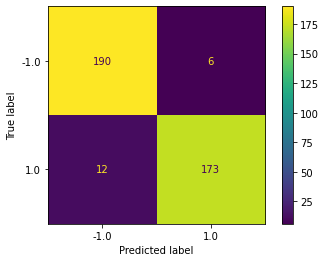

In [ ]:
#plt.figure(figsize=(10,10))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_new, y_hat_test, values_format='.5g')
print(cm_display.text_)

In [ ]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0,0]
fn = cf_matrix[0,1]
fp = cf_matrix[1,0]
tp = cf_matrix[1,1]
print('TN: ', tn)
print('FN: ', fn)
print('FP: ', fp)
print('TP: ', tp)
precision = tp/(tp+fp)
print('Precision: ', precision)
recall = tp/(tp+fn)
print('Recall: ', recall)
accuracy = (tn+tp)/(tn+tp+fn+fp)
print('accuracy: ', accuracy)

TN:  190
FN:  6
FP:  12
TP:  173
Precision:  0.9351351351351351
Recall:  0.9664804469273743
accuracy:  0.952755905511811


Q6) In the same model setup just change the shuffle parameter to False, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Which of the following statements are True based on your observations?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TN:  196
FN:  0
FP:  172
TP:  13
Precision:  0.07027027027027027
Recall:  1.0
accuracy:  0.5485564304461942


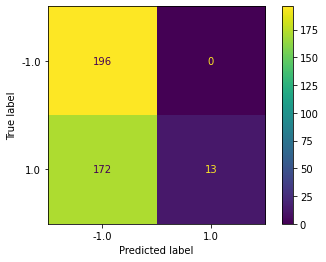

In [ ]:
percept1 = Perceptron(eta0=1,max_iter=100,fit_intercept=True, shuffle=False, random_state=42, warm_start=True, penalty=None)
percept1.fit(X_train_new, y_train_new)
y_hat_test1 = percept1.predict(X_test_new)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_new, y_hat_test1, values_format='.5g')
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0,0]
fn = cf_matrix[0,1]
fp = cf_matrix[1,0]
tp = cf_matrix[1,1]
print('TN: ', tn)
print('FN: ', fn)
print('FP: ', fp)
print('TP: ', tp)
precision = tp/(tp+fp)
print('Precision: ', precision)
recall = tp/(tp+fn)
print('Recall: ', recall)
accuracy = (tn+tp)/(tn+tp+fn+fp)
print('accuracy: ', accuracy)